In [18]:
print("Hello world")

Hello world


In [19]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

import re
import pickle


from collections import Counter

from nltk.corpus import stopwords



In [20]:
#reading the dataset
df =pd.read_csv('spam.csv', encoding="ISO-8859-1") 

print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [21]:
#Data Cleaning
print(df.shape,'\n')
print(df.columns,'\n')
df.info()

(5572, 5) 

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
#dropping unnecessary columns

df.drop(['Unnam(5)ed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.sample

,v1,v2
1004,ham,Umma. Did she say anything
573,ham,Waiting for your call.
5139,ham,Oh shut it. Omg yesterday I had a dream that I...
136,ham,He is there. You call and meet him
398,ham,"Good evening Sir, Al Salam Wahleykkum.sharing ..."


In [23]:
df.rename(columns={'v1':'class','v2':'input'},inplace=True)
df.head()

,class,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
print(df.duplicated().sum())
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

403
(5572, 2)
(5169, 2)


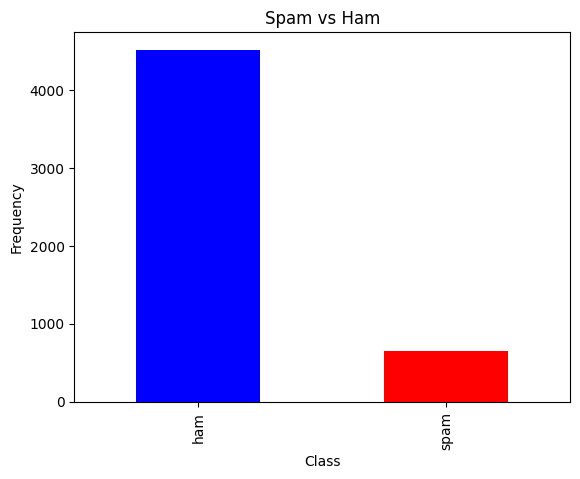

In [25]:
#visualizing the data
df['class'].value_counts().plot(kind='bar' , color=['blue','red'])
plt.title('Spam vs Ham')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()



In [26]:
#Creating new features for the dataset
#No of words in the message
#No of characters in the message
#No of Sentences in the message

df['word_count'] = df.apply(lambda row:nltk.word_tokenize(row['input']),
                            axis=1).apply(len)

df['char_count'] = df['input'].str.len()

df['sentence_count'] = df.apply(lambda row:nltk.sent_tokenize(row['input']),
                                axis=1).apply(len)

print(df.head(5))
print(df.describe())

  class                                              input  word_count  \
0   ham  Go until jurong point, crazy.. Available only ...          24   
1   ham                      Ok lar... Joking wif u oni...           8   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          37   
3   ham  U dun say so early hor... U c already then say...          13   
4   ham  Nah I don't think he goes to usf, he lives aro...          15   

   char_count  sentence_count  
0         111               2  
1          29               2  
2         155               2  
3          49               1  
4          61               1  
        word_count   char_count  sentence_count
count  5169.000000  5169.000000     5169.000000
mean     18.455794    78.977945        1.965564
std      13.324758    58.236293        1.448541
min       1.000000     2.000000        1.000000
25%       9.000000    36.000000        1.000000
50%      15.000000    60.000000        1.000000
75%      26.000000   117.00

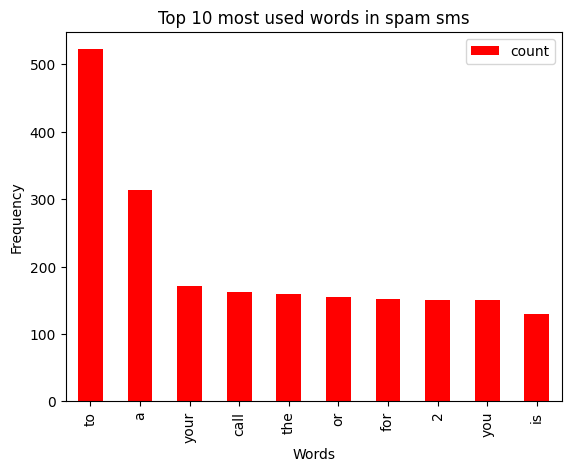

In [27]:
#Top 10 most used words in spam sms in form of graph

spam_words = ' '.join(list(df[df['class']=='spam']['input']))
spam_wc = Counter(spam_words.split())

spam_df = pd.DataFrame(spam_wc.most_common(10),
                          columns=['words', 'count'])

spam_df.plot.bar(x='words',y='count',color='red')
plt.title('Top 10 most used words in spam sms')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [29]:
#data preprocessing , cleaning text data
#text before
print(df['input'][:5])


0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: input, dtype: object


In [30]:
def clean_text(input):
    input = re.sub('[^a-zA-Z]', ' ', input) 
    input = input.lower() 
    input = input.split()
    
    input = ' '.join(input)
    return input

df['input'] = df['input'].apply(clean_text)

print(df['input'][:5])

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: input, dtype: object


In [31]:
# removing stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(input):
    input = input.split()
    input = [word for word in input if word not in stop_words]
    input = ' '.join(input)
    return input

df['input'] = df['input'].apply(remove_stopwords)

print(df['input'][:5])


0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4               nah think goes usf lives around though
Name: input, dtype: object


In [34]:
#Model Building using Naive Bayes


from sklearn.feature_extraction.text import CountVectorizer

cntvec = CountVectorizer()
X = cntvec.fit_transform(df['input']).toarray()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
Y = df['class'].values



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    
                                                    test_size=0.2, random_state=42)



from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

model = MultinomialNB() 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))


Accuracy Score:  0.9748549323017408
F1 Score:  0.9150326797385621
Precision Score:  0.8695652173913043
Recall Score:  0.9655172413793104


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['input']).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("\n New Scores:")
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))


 New Scores:
Accuracy Score:  0.9787234042553191
F1 Score:  0.9185185185185186
Precision Score:  0.992
Recall Score:  0.8551724137931035


In [33]:
#saving the model
pickle.dump(model, open('spam_model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))